In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


def plot_column(data, colname, methods=None, need_label=True, is_log=True):
    if methods is None:
        methods = data['Method'].unique()
    for method in methods:
        if method == 'FullLP':
            continue
        snr_list = []
        values_list = []
        for i, row in data.iterrows():
            if row['Method'] != method:
                continue
            snr_list.append(row['SNR'])
            values_list.append(row[colname])
        if need_label:
            plt.plot(snr_list, values_list, label=method)
        else:
            plt.plot(snr_list, values_list)
    if need_label:
        plt.legend()
    plt.xlabel('SNR')
    plt.ylabel(colname)
    if is_log:
        plt.semilogy()
    plt.show()

In [3]:
data_before = pd.read_csv('../reports/report_H05.csv')
data_after = pd.read_csv('../reports/report_opt.csv')

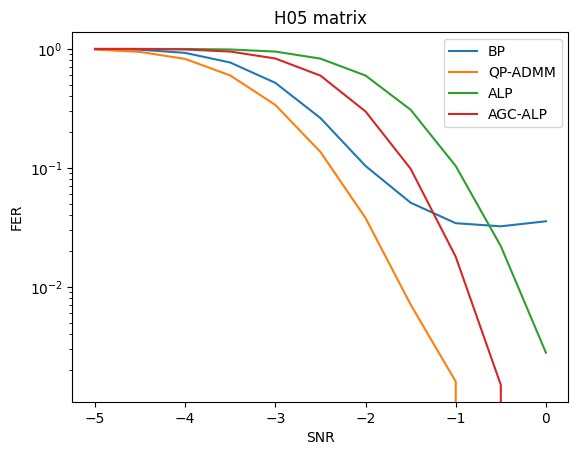

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
fig = plt.figure()
plt.title('H05 matrix')
plot_column(data_before, 'FER')
fig.savefig('H05_FER.eps')

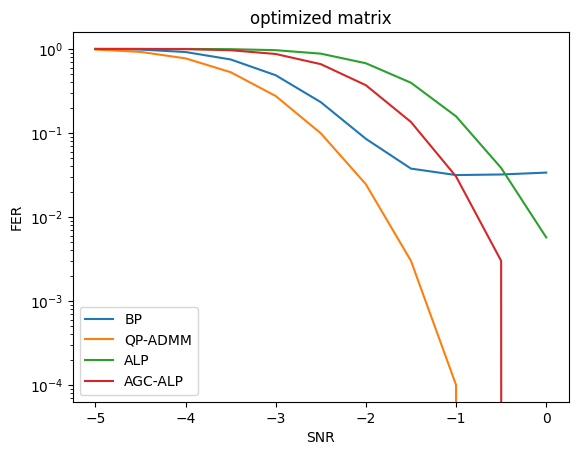

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
fig = plt.figure()
plt.title('optimized matrix')
plot_column(data_after, 'FER')
fig.savefig('opt_FER.eps')

In [6]:
def plot_compare(data1, data2, methods, colname):
    for method in methods:
        snr_list = []
        values_list = []
        for i, row in data1.iterrows():
            if row['Method'] != method:
                continue
            snr_list.append(row['SNR'])
            values_list.append(row[colname])
        plt.plot(snr_list, values_list, label=f'{method}, before')
    for method in methods:
        snr_list = []
        values_list = []
        for i, row in data2.iterrows():
            if row['Method'] != method:
                continue
            snr_list.append(row['SNR'])
            values_list.append(row[colname])
        plt.plot(snr_list, values_list, label=f'{method}, after')
    plt.legend()
    plt.xlabel('SNR')
    plt.ylabel(colname)
    plt.semilogy()
    plt.show()

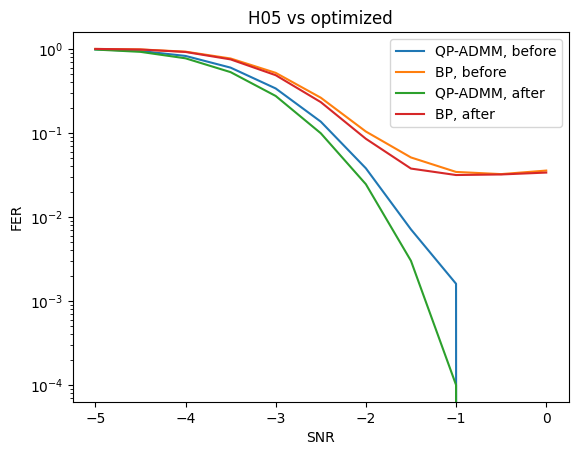

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
fig = plt.figure()
plt.title('H05 vs optimized')
plot_compare(data_before, data_after, ['QP-ADMM', 'BP'], 'FER')
fig.savefig('impr_qp_bp.eps')

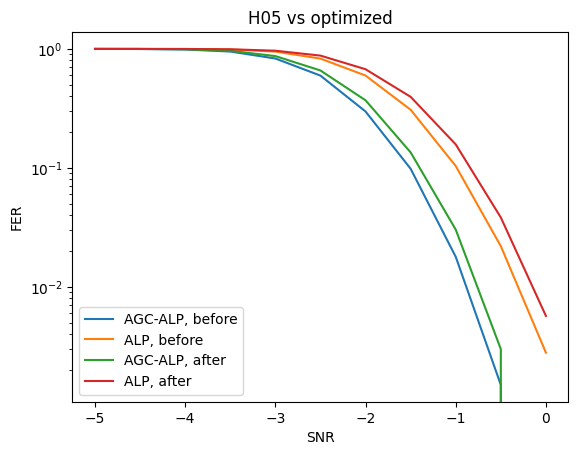

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
fig = plt.figure()
plt.title('H05 vs optimized')
plot_compare(data_before, data_after, ['AGC-ALP', 'ALP'], 'FER')
fig.savefig('impr_lp.eps')

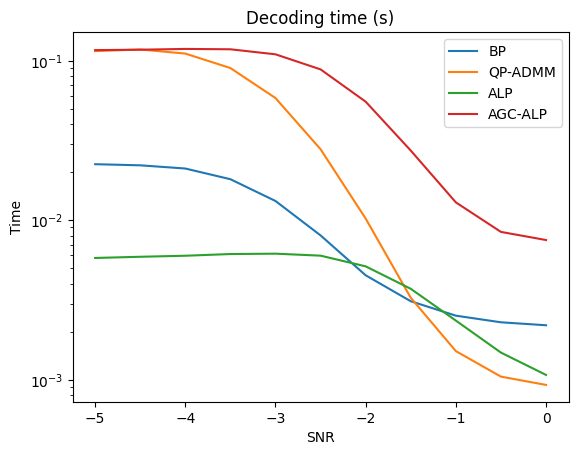

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
fig = plt.figure()
plt.title('Decoding time (s)')
plot_column(data_before, 'Time')
fig.savefig('time.eps')

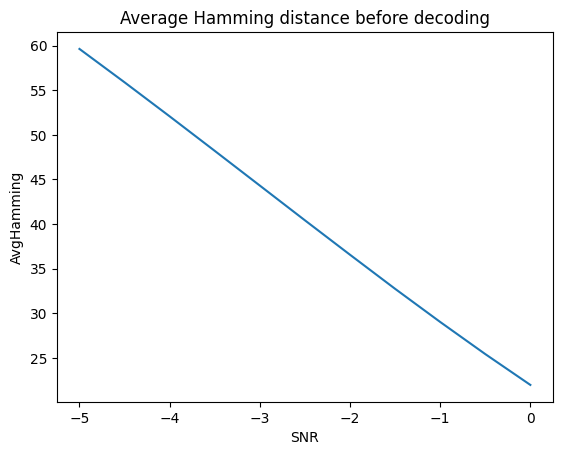

In [10]:
fig = plt.figure()
plt.title('Average Hamming distance before decoding')
plot_column(data_before, 'AvgHamming', methods=['QP-ADMM'], is_log=False, need_label=False)
fig.savefig('hamming.eps')